# First Continuous Evaluation: The Wine Quality Dataset


This notebook template contains the enunciates of the exercises you have to solve in order to follow the continuous evaluation.

This evaluation is divided into 5 exercises. Each exercise have more than one sub-field. Please make at least one new code cell for each sub-field and a markdown cell for the explanation.

Comments in the code are welcomed.

The data needed to solve the exercises is in the following URL:

In [3]:
url = "https://github.com/f-guitart/data_mining/blob/master/data/wine_quality_errors.csv"

**Question 1**

    a. Load the csv file as a DataFrame

In [88]:
import pandas as pd
import numpy as np
#index_col = 0 -> es descarta la primera columna ja que aquesta només és un índex
df = pd.read_csv("wine_quality_errors.csv", sep=";", index_col=0)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,-0.9978,3.51,NaN,NaN,Q5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,-0.9968,NaN,NaN,NaN,Q5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,-0.9970,NaN,0.65,NaN,Q5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,-0.9980,3.16,NaN,9.8%,Q6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,-0.9978,NaN,0.56,9.4%,Q5


    b. Check the size of the dataset 

In [89]:
df.shape

(1599, 12)

    c. Check the types of the variables

In [90]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides                object
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                  object
quality                  object
dtype: object

**Question 2**

    a. After having checked variable types, ¿which ones you think are not correct? ¿why?

In [ ]:
#La columna chlorides es podria passar a float64. El problema és que alguns valors tenen la coma abaix i d'altres a dalt.
#La columna alcohol es podria considerar com una dada qualitativa i deixar-la com a object, no obstant, és possible que doni més joc sent float.
#També crec que facilitaria molt l'anàlisi si de la columna qualitat s'eliminés la 'Q' i es tractés com un enter.

    b. Provide the correct type to each variable transforming the dataset into a technical correct dataset

In [92]:
#Es canvia la coma alta per punt decimal normal
df.chlorides = df.chlorides.apply(lambda x: str(x).replace("'", "."))
df.chlorides = df.chlorides.astype(float)
print("Chlorides")
print(df.chlorides.dtype)
print(df.chlorides.head())

#Es queda amb tot el string menys el últim caràcter si aquest és un %
df.alcohol = df.alcohol.apply(lambda x : str(x)[:-1] if str(x)[-1] == '%' else x)
df.alcohol = df.alcohol.astype(float)
print("Alcohol")
print(df.alcohol.dtype)
print(df.alcohol.head())

Chlorides
float64
0    0.076
1    0.098
2    0.092
3    0.075
4    0.076
Name: chlorides, dtype: float64
Alcohol
float64
0    NaN
1    NaN
2    NaN
3    9.8
4    9.4
Name: alcohol, dtype: float64


    c. Regarding quality variable, which kind of variable is. is it correct to leave it as "string"?

In [93]:
#Com s'ha proposat abans, es podria eliminar la 'Q' i tractar-la com un enter per facilitar el anàlisi posterior

df.quality = df.quality.apply(lambda x : str(x)[1] if str(x)[0] == 'Q' else x)
df.quality = df.quality.astype(int)

df.quality.dtype

print(df.quality.head())

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64


**Question 3**

    a. Select the wines with highest quality using iloc and then measure the mean

In [94]:
#Quality és la columna 11
highest_quality_wines = df[df.iloc[:, 11] == df.iloc[:, 11].max()]

print(highest_quality_wines)
print(highest_quality_wines.mean())

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
267             7.9              0.35         0.46             3.6      0.078   
278            10.3              0.32         0.45             6.4      0.073   
390             5.6              0.85         0.05             1.4      0.045   
440            12.6              0.31         0.72             2.2      0.072   
455            11.3              0.62         0.67             5.2      0.086   
481             9.4              0.30         0.56             2.8      0.080   
495            10.7              0.35         0.53             2.6      0.070   
498            10.7              0.35         0.53             2.6      0.070   
588             5.0              0.42         0.24             2.0      0.060   
828             7.8              0.57         0.09             2.3      0.065   
1061            9.1              0.40         0.50             1.8      0.071   
1090           10.0         

    b. Select the wines with lowest quality using loc and then measure the mean

In [95]:
lowest_quality_wines = df[df.loc[:, "quality"] == df.loc[:, "quality"].min()]

print(lowest_quality_wines)
print(lowest_quality_wines.mean())

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
459            11.6             0.580         0.66            2.20      0.074   
517            10.4             0.610         0.49            2.10      0.200   
690             7.4             1.185         0.00            4.25      0.097   
832            10.4             0.440         0.42            1.50      0.145   
899             8.3             1.020         0.02            3.40      0.084   
1299            7.6             1.580         0.00            2.10      0.137   
1374            6.8             0.815         0.00            1.20      0.267   
1469            7.3             0.980         0.05            2.10      0.061   
1478            7.1             0.875         0.05            5.70      0.082   
1505            6.7             0.760         0.02            1.80      0.078   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
459                  10.0      

    c. Group wines by quality and provide the mean, median, standard deviation and the 3 quartiles

In [96]:
#S'obté tots els valors diferents que quality pot pendre. Per cada un dels valors es forma un grup sobre el que
#es calculen les estadístiques
for quality in df.quality.unique():
    current_group = df[df.loc[:, "quality"] == quality]
    print("---Quality = " + str(quality) + " ---")
    print("Mean:\n" + str(current_group.mean()))
    print("Median:\n" + str(current_group.median()))
    print("Std:\n" + str(current_group.std()))
    print("Quartiles:\n" + str(current_group.quantile([.25,.5,.75])))

---Quality = 5 ---
Mean:
fixed acidity            8.167254
volatile acidity         0.577041
citric acid              0.243686
residual sugar           2.528855
chlorides                0.092736
free sulfur dioxide     16.983847
total sulfur dioxide    56.513950
density                 -0.997104
pH                       3.305937
sulphates                0.631538
alcohol                  9.863050
quality                  5.000000
dtype: float64
Median:
fixed acidity            7.800
volatile acidity         0.580
citric acid              0.230
residual sugar           2.200
chlorides                0.081
free sulfur dioxide     15.000
total sulfur dioxide    47.000
density                 -0.997
pH                       3.300
sulphates                0.590
alcohol                  9.600
quality                  5.000
dtype: float64
Std:
fixed acidity            1.563988
volatile acidity         0.164801
citric acid              0.180003
residual sugar           1.359753
chlorides       

    d. Provide the frequency table of quality variable

In [97]:
pd.crosstab(index=df["quality"], columns="count")

col_0,count
quality,
3,10
4,53
5,681
6,638
7,199
8,18


**Question 4**

    a. There is one inconsistent variable. can you say which one is? hint: mass and volume can't be negative

In [98]:
df.density

0      -0.99780
1      -0.99680
2      -0.99700
3      -0.99800
4      -0.99780
5      -0.99780
6      -0.99640
7      -0.99460
8      -0.99680
9      -0.99780
10     -0.99590
11     -0.99780
12     -0.99430
13     -0.99740
14     -0.99860
15     -0.99860
16     -0.99690
17     -0.99680
18     -0.99740
19     -0.99690
20     -0.99680
21     -0.99820
22     -0.99660
23     -0.99680
24     -0.99680
25     -0.99550
26     -0.99620
27     -0.99660
28     -0.99720
29     -0.99640
         ...   
1569   -0.99396
1570   -0.99340
1571   -0.99514
1572   -0.99632
1573   -0.99467
1574   -0.99677
1575   -0.99474
1576   -0.99588
1577   -0.99622
1578   -0.99540
1579   -0.99402
1580   -0.99470
1581   -0.99402
1582   -0.99362
1583   -0.99578
1584   -0.99484
1585   -0.99494
1586   -0.99492
1587   -0.99483
1588   -0.99414
1589   -0.99770
1590   -0.99314
1591   -0.99402
1592   -0.99574
1593   -0.99651
1594   -0.99490
1595   -0.99512
1596   -0.99574
1597   -0.99547
1598   -0.99549
Name: density, Length: 1

    b. You discover that the hydrometer is providing -x, where x is the correct measure, how would you correct the error

In [99]:
#Si una densitat és negativa, aquesta es multiplica *-1
df.density = df.density.apply(lambda x : x*-1 if x < 0 else x)
df.density

0       0.99780
1       0.99680
2       0.99700
3       0.99800
4       0.99780
5       0.99780
6       0.99640
7       0.99460
8       0.99680
9       0.99780
10      0.99590
11      0.99780
12      0.99430
13      0.99740
14      0.99860
15      0.99860
16      0.99690
17      0.99680
18      0.99740
19      0.99690
20      0.99680
21      0.99820
22      0.99660
23      0.99680
24      0.99680
25      0.99550
26      0.99620
27      0.99660
28      0.99720
29      0.99640
         ...   
1569    0.99396
1570    0.99340
1571    0.99514
1572    0.99632
1573    0.99467
1574    0.99677
1575    0.99474
1576    0.99588
1577    0.99622
1578    0.99540
1579    0.99402
1580    0.99470
1581    0.99402
1582    0.99362
1583    0.99578
1584    0.99484
1585    0.99494
1586    0.99492
1587    0.99483
1588    0.99414
1589    0.99770
1590    0.99314
1591    0.99402
1592    0.99574
1593    0.99651
1594    0.99490
1595    0.99512
1596    0.99574
1597    0.99547
1598    0.99549
Name: density, Length: 1

    c. For the nan values, provide the mean of the variable depending on the quality value. i.e. if quality is a and i have a nan value in var 1, provide the mean of var1 where quality is a

In [100]:
#S'obté les columnes que tenen algun valor null
display(df.isnull().sum())

#S'ha obtingut que les columnes amb valors null són pH, sulphates i alcohol.
#Per cada valor de pH que sigui null, es substitueix per la mitja d'aquells valors de pH amb la mateixa qualitat
df['pH'] = df.apply(
    lambda row: df.loc[df.loc[:, 'quality'] == row['quality'], 'pH'].mean() if np.isnan(row['pH']) else row['pH'],
    axis=1
)

#Per cada valor de sulphates que sigui null, es substitueix per la mitja d'aquells valors de sulphates amb la mateixa qualitat
df['sulphates'] = df.apply(
    lambda row: df.loc[df.loc[:, 'quality'] == row['quality'], 'sulphates'].mean() if np.isnan(row['sulphates']) else row['sulphates'],
    axis=1
)

#Per cada valor de alcohol que sigui null, es substitueix per la mitja d'aquells valors de alcohol amb la mateixa qualitat
df['alcohol'] = df.apply(
    lambda row: df.loc[df.loc[:, 'quality'] == row['quality'], 'alcohol'].mean() if np.isnan(row['alcohol']) else row['alcohol'],
    axis=1
)

display(df.isnull().sum())

fixed acidity             0
volatile acidity          0
citric acid               0
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                      815
sulphates               835
alcohol                 814
quality                   0
dtype: int64

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

    d. Check outliers in variables fixed acidity, volatile acidity, and citric acid using the Tukey's box-and-whiskers method 

In [101]:
df2 = df[['fixed acidity', 'volatile acidity', 'citric acid']]

display(df2.quantile([.25,.5,.75]))
iqr = df2.quantile([.25,.75]).apply(lambda x: x.iloc[1] - x.iloc[0])
display("Our IQR is:", iqr)

high_out = df2.quantile([.75]) + iqr*1.5 
low_out = df2.quantile([.25]) - iqr*1.5

print("-> high whiskers:")
display(high_out)
print("-> lower whiskers")
display(low_out)

print("Upper outliers:")
display(df2[df2["fixed acidity"] > high_out.loc[0.75,"fixed acidity"]])
display(df2[df2["volatile acidity"] > high_out.loc[0.75,"volatile acidity"]])
display(df2[df2["citric acid"] > high_out.loc[0.75,"citric acid"]])

print("Lower outliers:")
display(df2[df2["fixed acidity"] < low_out.loc[0.25,"fixed acidity"]])
display(df2[df2["volatile acidity"] < low_out.loc[0.25,"volatile acidity"]])
display(df2[df2["citric acid"] < low_out.loc[0.25,"citric acid"]])



,fixed acidity,volatile acidity,citric acid
0.25,7.1,0.39,0.09
0.50,7.9,0.52,0.26
0.75,9.2,0.64,0.42


'Our IQR is:'

fixed acidity       2.10
volatile acidity    0.25
citric acid         0.33
dtype: float64

-> high whiskers:


,fixed acidity,volatile acidity,citric acid
0.75,12.35,1.015,0.915


-> lower whiskers


,fixed acidity,volatile acidity,citric acid
0.25,3.95,0.015,-0.405


Upper outliers:


,fixed acidity,volatile acidity,citric acid
205,12.8,0.300,0.74
206,12.8,0.300,0.74
243,15.0,0.210,0.44
244,15.0,0.210,0.44
264,12.5,0.560,0.49
294,13.3,0.340,0.52
328,13.4,0.270,0.62
338,12.4,0.490,0.58
339,12.5,0.280,0.54
347,13.8,0.490,0.67


,fixed acidity,volatile acidity,citric acid
38,5.7,1.130,0.09
94,5.0,1.020,0.04
120,7.3,1.070,0.09
126,8.2,1.330,0.00
127,8.1,1.330,0.00
134,7.9,1.040,0.05
199,6.9,1.090,0.06
553,5.0,1.040,0.24
672,9.8,1.240,0.34
690,7.4,1.185,0.00


,fixed acidity,volatile acidity,citric acid
151,9.2,0.52,1.0


Lower outliers:


,fixed acidity,volatile acidity,citric acid


,fixed acidity,volatile acidity,citric acid


,fixed acidity,volatile acidity,citric acid


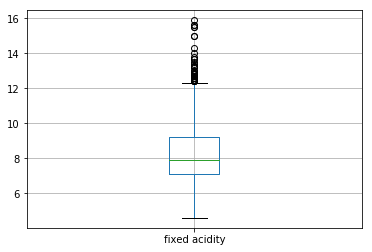

In [102]:
display(df2.boxplot(column=["fixed acidity"],return_type="axes"))

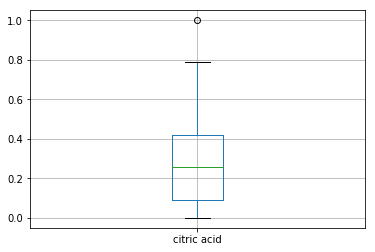

In [103]:
display(df2.boxplot(column=["citric acid"],return_type="axes"))

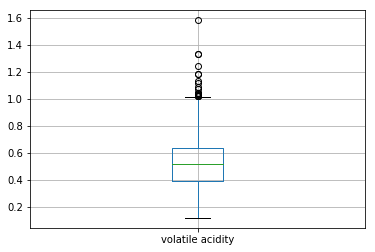

In [104]:
display(df2.boxplot(column=["volatile acidity"],return_type="axes"))

**Question 5**

    a. Plot the distribution of  chlorides

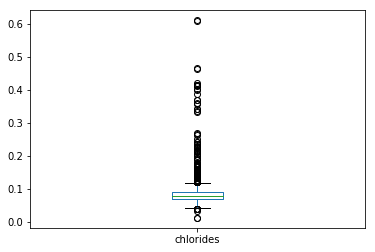

In [105]:
df["chlorides"].plot.box()

    b. Plot the distribution of quality

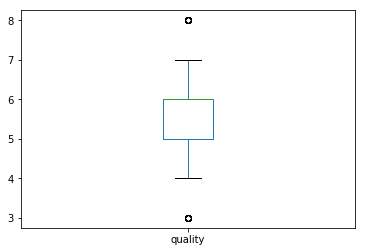

In [106]:
df["quality"].plot.box()

    c. Plot the distribution of alcohol but not taking highest and lowest qualities


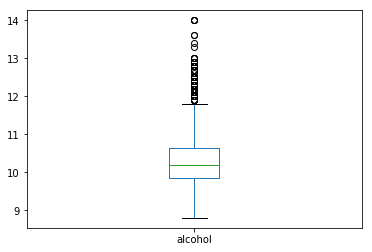

In [107]:
df.loc[(df.loc[:, "quality"] > df.loc[:, "quality"].min()) & (df.loc[:, "quality"] < df.loc[:, "quality"].max()), "alcohol"].plot.box()

    d. Compare sulphates and alcohol in an scatter plot. then use quality as third dimension

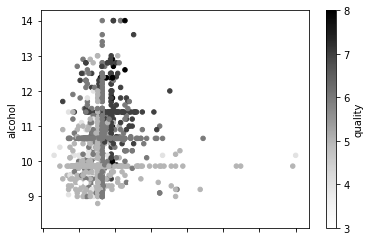

In [108]:
df.plot.scatter(x="sulphates", y="alcohol", c='quality');